# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/bbhatt001/human-microbiome-project

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv("dfFinal.csv")
df.head(10)

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,0,1,8,5,2,1,1,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,1,6,1,11,1,1,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,2,1,1,5,5,1,1,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,3,1,8,2,15,1,1,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,4,2,12,1,3,0,1,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
5,5,2,12,1,17,0,1,22,27,10,...,1,1,1,0,50,0,16.2,0.3,-0.92,Graduate
6,6,1,1,1,12,1,1,13,28,8,...,0,1,0,1,18,0,15.5,2.8,-4.06,Graduate
7,7,1,9,4,11,1,1,22,27,10,...,0,0,1,0,22,0,15.5,2.8,-4.06,Dropout
8,8,1,1,3,10,1,15,1,1,10,...,0,1,0,1,21,1,16.2,0.3,-0.92,Graduate
9,9,1,1,1,10,1,1,1,14,5,...,1,0,0,0,18,0,8.9,1.4,3.51,Dropout


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

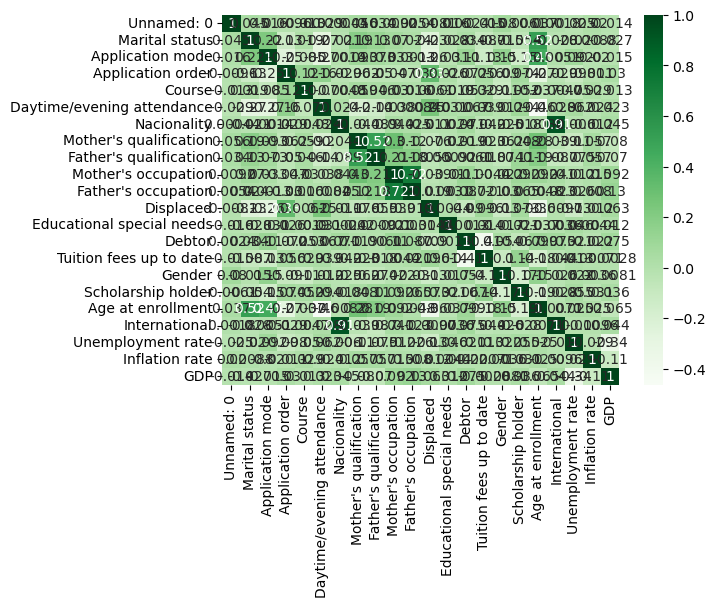

In [4]:
sns.heatmap(df.corr(), cmap="Greens", annot = True)
plt.show()

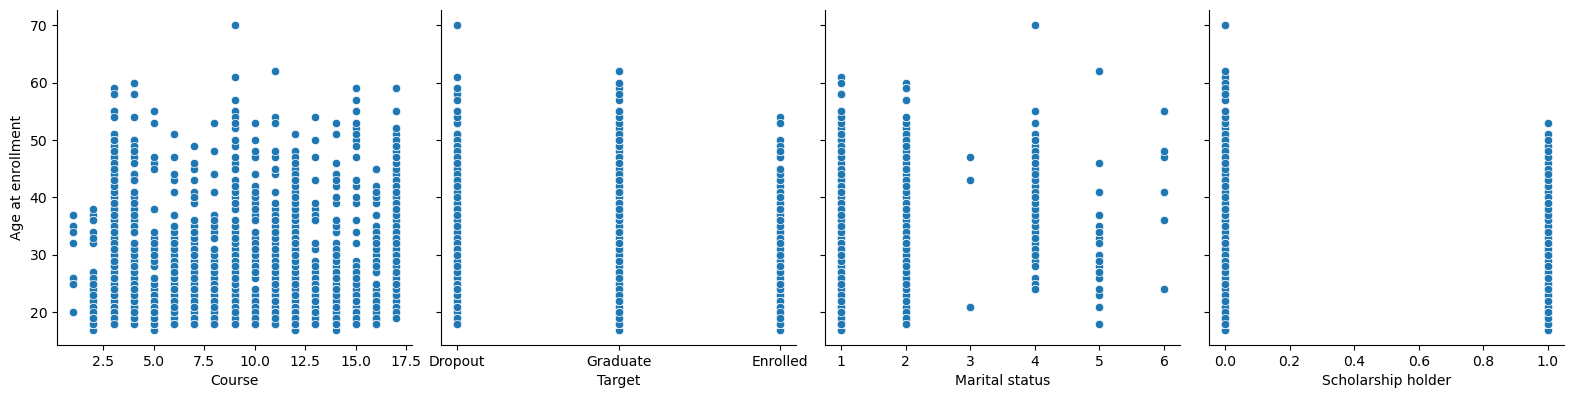

In [12]:
sns.pairplot(df, x_vars=['Course','Target','Marital status', 'Scholarship holder'], 
             y_vars='Age at enrollment', height=4, aspect=1, kind='scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

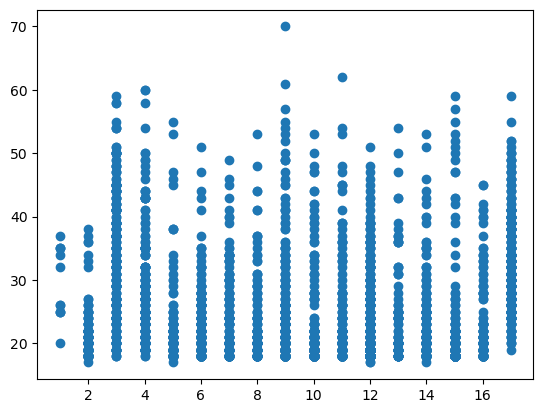

In [42]:
X = df['Course']
Y = df['Age at enrollment']
plt.scatter(X,Y)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=100)
X_train
Y_train


3205    28
4113    24
1739    38
1640    19
3012    20
        ..
4149    21
1890    18
350     24
79      33
3927    18
Name: Age at enrollment, Length: 3096, dtype: int64

In [47]:
import statsmodels.api as sn
X_train_sn = sn.add_constant(X_train)

lr=sn.OLS(Y_train, X_train_sn).fit()

lr.params
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Age at enrollment   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.315
Date:                Wed, 07 Jun 2023   Prob (F-statistic):            0.00396
Time:                        18:58:20   Log-Likelihood:                -10647.
No. Observations:                3096   AIC:                         2.130e+04
Df Residuals:                    3094   BIC:                         2.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1392      0.337     71.687      0.000      23.479      24.799
Course        -0.0897      0.031     -2.884      0.004      -0.151      -0.029
==============================================================================
Omnibus:                     1244.407   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.108
Skew:                           2.050   Prob(JB):                         0.00
Kurtosis:                       7.160   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

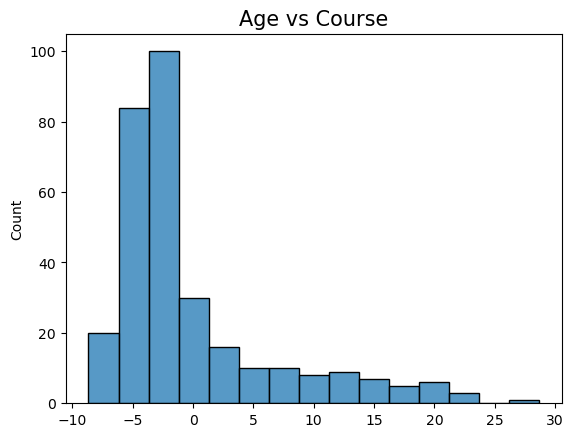

In [44]:
Y_train_pred = lr.predict(X_train_sn)
res= (Y_train-Y_train_pred)
fig= plt.figure()
sns.histplot(res, bins=15)
plt.title('Age vs Course', fontsize=15)
plt.show()

## Error Terms

Finally, plot your error terms!

In [66]:
X_test_sn =sn.add_constant(X_test)
Y_test_pred =lr.predict(X_test_sn)
Y_test_pred


2944    23.062354
1742    23.421307
4150    22.793138
459     22.793138
2213    23.241830
          ...    
3400    23.241830
2005    23.600784
463     23.331569
3411    23.062354
3109    23.331569
Length: 1328, dtype: float64

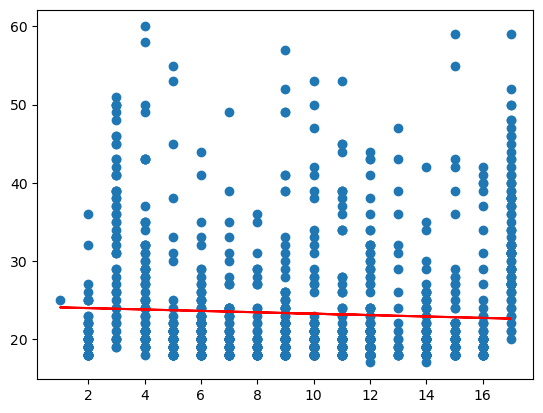

In [67]:

from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, Y_test_pred)
r_squared

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred, 'r')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, Y_train_lm, Y_test_lm = train_test_split(
    X,Y, train_size=.7, test_size=.3, random_state=100)
X_train_lm.shape

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print (X_train_lm.shape)
print (X_test_lm.shape)

(3096, 1)
(1328, 1)


In [63]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

lm.fit(X_train_lm, Y_train_lm)

print (f"Intercept: {lm.intercept_}")
print (f"Slope: {lm.coef_}")


Intercept: 24.13921428604634
Slope: [-0.0897384]


In [65]:
Y_train_pred = lm.predict(X_train_lm)
Y_test_pred = lm.predict(X_test_lm)

print(r2_score(Y_train,Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.002680351987795704
-0.0023098225157272


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?

3. Was your plot of the error terms a bell curve?

In [ ]:
#1.0.054
#2.No, but the excerise associated with this chapter did have data that showed a condusive data set for linear review. 
#3. No. 